In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation, metrics
import matplotlib.pylab as plt

In [50]:
train = pd.read_csv('../data/train_featureV1.csv')
test = pd.read_csv('../data/test_featureV2.csv')

In [51]:
train = train.sample(frac=1).reset_index(drop=True)
train

,uid,label,voice_talk_time_count,voice_talk_time_std,voice_talk_time_max,voice_talk_time_min,voice_talk_time_median,voice_talk_time_mean,voice_talk_time_sum,voice_opp_num_unique_count,...,wa_up_flow_min,wa_up_flow_median,wa_up_flow_mean,wa_up_flow_sum,wa_down_flow_std,wa_down_flow_max,wa_down_flow_min,wa_down_flow_median,wa_down_flow_mean,wa_down_flow_sum
0,u1877,0,13.0,471.857934,1752.0,9.0,46.0,192.923077,2508.0,5.0,...,41.0,8202.0,88103.394619,3.929411e+07,7.238801e+06,1.141611e+08,0.0,15610.0,1.123536e+06,5.010969e+08
1,u1332,0,116.0,124.877918,784.0,5.0,54.0,97.465517,11306.0,30.0,...,0.0,3371.0,428466.830087,6.379871e+08,4.804560e+06,1.388108e+08,0.0,5477.0,6.544100e+05,9.744165e+08
2,u2758,0,83.0,35.422205,238.0,1.0,25.0,35.590361,2954.0,17.0,...,41.0,2966.0,25311.213270,5.340666e+06,3.427026e+05,4.498169e+06,0.0,5469.0,7.510883e+04,1.584796e+07
3,u4601,1,15.0,92.632762,376.0,1.0,42.0,70.600000,1059.0,2.0,...,40.0,6283.0,326201.416667,1.096037e+08,1.027373e+07,1.329986e+08,0.0,8045.0,1.345599e+06,4.521212e+08
4,u0795,0,775.0,151.221809,1069.0,1.0,74.0,127.316129,98670.0,322.0,...,0.0,2224.5,35094.644788,1.817903e+07,8.740399e+05,1.561364e+07,0.0,2673.5,1.830555e+05,9.482274e+07
5,u1953,0,15.0,65.222549,207.0,14.0,90.0,95.533333,1433.0,6.0,...,40.0,8266.5,154972.211679,8.492477e+07,2.235862e+07,3.975613e+08,0.0,13036.0,2.459291e+06,1.347691e+09
6,u1639,0,159.0,54.262087,398.0,5.0,40.0,57.371069,9122.0,19.0,...,0.0,7603.0,218984.805004,2.976004e+08,1.257740e+07,2.485892e+08,0.0,14227.0,2.275916e+06,3.092970e+09
7,u3519,0,1.0,0.000000,1.0,1.0,1.0,1.000000,1.0,1.0,...,195.0,6585.0,195346.600000,2.930199e+06,1.030225e+07,3.994208e+07,111.0,8767.0,2.703492e+06,4.055238e+07
8,u0210,0,309.0,187.812419,1191.0,1.0,67.0,140.423948,43391.0,74.0,...,0.0,5301.0,56508.643529,7.815145e+07,2.293714e+06,5.452587e+07,0.0,8060.0,3.100945e+05,4.288607e+08
9,u1153,0,4.0,63.887271,141.0,11.0,14.5,45.250000,181.0,2.0,...,65.0,7376.5,298102.033333,1.788612e+07,8.089902e+06,4.456530e+07,80.0,10064.0,2.277784e+06,1.366671e+08


In [52]:
train = train.fillna(0)
test = test.fillna(0)

In [79]:
def evalMetric(preds,dtrain):
    
    label = dtrain.get_label()
    
    
    pre = pd.DataFrame({'preds':preds,'label':label})
    pre = pre.sort_values(by='preds',ascending=False)
    
    auc = metrics.roc_auc_score(pre.label,pre.preds)

    pre.preds=pre.preds.map(lambda x: 1 if x>=0.5 else 0)

    f1 = metrics.f1_score(pre.label,pre.preds)
    
    
    res = 0.6*auc +0.4*f1
    
    return 'res',res

In [54]:
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True


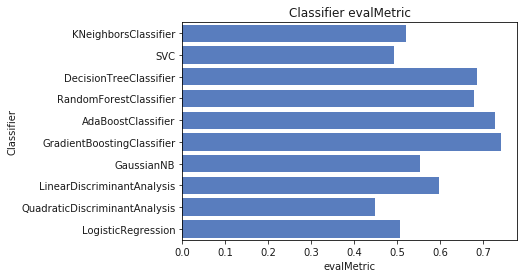

In [29]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols=["Classifier", "evalMetric"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

t = train.drop(['uid'], axis=1)
t = t.values
X = t[0::, 1::]
Y = t[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, Y_train)
        train_predictions = clf.predict(X_test)
        #print (len(Y_test)==len(train_predictions))
        acc = accuracy_score(Y_test, train_predictions)
        f1 = metrics.f1_score(Y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += 0.6*acc+0.4*f1
        else:
            acc_dict[name] = 0.6*acc+0.4*f1
            
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    
plt.xlabel('evalMetric')
plt.title('Classifier evalMetric')

sns.set_color_codes("muted")
sns.barplot(x="evalMetric", y="Classifier", data=log, color="b")

In [55]:
ntrain = train.shape[0]
ntest = test.shape[0]
ntrain, ntest

(4999, 3000)

In [78]:
train.head()

,uid,label,voice_talk_time_count,voice_talk_time_std,voice_talk_time_max,voice_talk_time_min,voice_talk_time_median,voice_talk_time_mean,voice_talk_time_sum,voice_opp_num_unique_count,...,wa_up_flow_min,wa_up_flow_median,wa_up_flow_mean,wa_up_flow_sum,wa_down_flow_std,wa_down_flow_max,wa_down_flow_min,wa_down_flow_median,wa_down_flow_mean,wa_down_flow_sum
0,u1877,0,13.0,471.857934,1752.0,9.0,46.0,192.923077,2508.0,5.0,...,41.0,8202.0,88103.394619,39294114.0,7.238801e+06,114161100.0,0.0,15610.0,1.123536e+06,501096907.0
1,u1332,0,116.0,124.877918,784.0,5.0,54.0,97.465517,11306.0,30.0,...,0.0,3371.0,428466.830087,637987110.0,4.804560e+06,138810758.0,0.0,5477.0,6.544100e+05,974416489.0
2,u2758,0,83.0,35.422205,238.0,1.0,25.0,35.590361,2954.0,17.0,...,41.0,2966.0,25311.213270,5340666.0,3.427026e+05,4498169.0,0.0,5469.0,7.510883e+04,15847964.0
3,u4601,1,15.0,92.632762,376.0,1.0,42.0,70.600000,1059.0,2.0,...,40.0,6283.0,326201.416667,109603676.0,1.027373e+07,132998615.0,0.0,8045.0,1.345599e+06,452121184.0
4,u0795,0,775.0,151.221809,1069.0,1.0,74.0,127.316129,98670.0,322.0,...,0.0,2224.5,35094.644788,18179026.0,8.740399e+05,15613644.0,0.0,2673.5,1.830555e+05,94822741.0


In [57]:
x_train = train.drop(['uid', 'label'], axis=1).values
y_train = train['label']
x_test = test.drop('uid', axis=1).values

In [49]:
a = [n for n in range(0, 1000)]
b = [n for n in range(2000,4999)]
len(a + b)

3999

In [58]:
et = ExtraTreesClassifier(n_estimators=800, max_depth=7, min_samples_leaf=2,verbose=0, oob_score=True, bootstrap=True)
et_train = np.zeros((ntrain,))
et_test = np.zeros((ntest,))
et_test_skf = np.zeros((5, ntest))

#test = 0:1000
train_index = [n for n in range(1000, 4999)]
test_index = [n for n in range(0, 1000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

et.fit(x_tr, y_tr)
et_train[test_index] = et.predict(x_te)
et_test_skf[0, :] = et.predict(x_test)
print(0)
print(et.oob_score_)
print(et_test_skf[0,:])

#test = 1000:2000
train_index = [n for n in range(0, 1000)] + [n for n in range(2000, 4999)]
test_index = [n for n in range(1000, 2000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

et.fit(x_tr, y_tr)
et_train[test_index] = et.predict(x_te)
et_test_skf[1, :] = et.predict(x_test)
print(1)
print(et.oob_score_)
print(et_test_skf[1,:])

#test = 2000:3000
train_index = [n for n in range(0, 2000)] + [n for n in range(3000, 4999)]
test_index = [n for n in range(2000, 3000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

et.fit(x_tr, y_tr)
et_train[test_index] = et.predict(x_te)
et_test_skf[2, :] = et.predict(x_test)
print(2)
print(et.oob_score_)
print(et_test_skf[2,:])

#test = 3000:4000
train_index = [n for n in range(0, 3000)] + [n for n in range(4000, 4999)]
test_index = [n for n in range(3000, 4000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

et.fit(x_tr, y_tr)
et_train[test_index] = et.predict(x_te)
et_test_skf[3, :] = et.predict(x_test)
print(3)
print(et.oob_score_)
print(et_test_skf[3,:])

#test = 4000:4999
train_index = [n for n in range(0, 4000)]
test_index = [n for n in range(4000, 4999)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

et.fit(x_tr, y_tr)
et_train[test_index] = et.predict(x_te)
et_test_skf[4, :] = et.predict(x_test)

print(4)
print(et.oob_score_)
print(et_test_skf[4,:])

et_test[:] = et_test_skf.mean(axis=0)

0
0.8269567391847962
[0. 0. 0. ... 0. 0. 0.]
1
0.8307076769192298
[0. 0. 0. ... 0. 0. 0.]
2
0.8264566141535384
[0. 0. 0. ... 0. 0. 0.]
3
0.8304576144036009
[0. 0. 0. ... 0. 0. 0.]
4
0.831
[0. 0. 0. ... 0. 0. 0.]


In [59]:
rf = RandomForestClassifier(n_estimators=800, max_depth=8, min_samples_leaf=2,verbose=0, max_features='sqrt',oob_score=True, bootstrap=True)
rf_train = np.zeros((ntrain,))
rf_test = np.zeros((ntest,))
rf_test_skf = np.zeros((5, ntest))

#test = 0:1000
train_index = [n for n in range(1000, 4999)]
test_index = [n for n in range(0, 1000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

rf.fit(x_tr, y_tr)
rf_train[test_index] = rf.predict(x_te)
rf_test_skf[0, :] = rf.predict(x_test)
print(0)
print(rf.oob_score_)
print(rf_test_skf[0,:])

#test = 1000:2000
train_index = [n for n in range(0, 1000)] + [n for n in range(2000, 4999)]
test_index = [n for n in range(1000, 2000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

rf.fit(x_tr, y_tr)
rf_train[test_index] = rf.predict(x_te)
rf_test_skf[1, :] = rf.predict(x_test)
print(1)
print(rf.oob_score_)
print(rf_test_skf[1,:])

#test = 2000:3000
train_index = [n for n in range(0, 2000)] + [n for n in range(3000, 4999)]
test_index = [n for n in range(2000, 3000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

rf.fit(x_tr, y_tr)
rf_train[test_index] = rf.predict(x_te)
rf_test_skf[2, :] = rf.predict(x_test)
print(2)
print(rf.oob_score_)
print(rf_test_skf[2,:])

#test = 3000:4000
train_index = [n for n in range(0, 3000)] + [n for n in range(4000, 4999)]
test_index = [n for n in range(3000, 4000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

rf.fit(x_tr, y_tr)
rf_train[test_index] = rf.predict(x_te)
rf_test_skf[3, :] = rf.predict(x_test)
print(3)
print(rf.oob_score_)
print(rf_test_skf[3,:])

#test = 4000:4999
train_index = [n for n in range(0, 4000)]
test_index = [n for n in range(4000, 4999)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

rf.fit(x_tr, y_tr)
rf_train[test_index] = rf.predict(x_te)
rf_test_skf[4, :] = rf.predict(x_test)

print(4)
print(rf.oob_score_)
print(rf_test_skf[4,:])

rf_test[:] = rf_test_skf.mean(axis=0)

0
0.8449612403100775
[0. 0. 0. ... 0. 0. 0.]
1
0.8467116779194799
[0. 0. 0. ... 0. 0. 0.]
2
0.8442110527631908
[0. 0. 0. ... 0. 0. 0.]
3
0.8457114278569643
[0. 0. 0. ... 0. 0. 0.]
4
0.844
[0. 0. 0. ... 0. 0. 0.]


In [60]:
ada = AdaBoostClassifier(n_estimators=800, learning_rate=0.5)
ada_train = np.zeros((ntrain,))
ada_test = np.zeros((ntest,))
ada_test_skf = np.zeros((5, ntest))

#test = 0:1000
train_index = [n for n in range(1000, 4999)]
test_index = [n for n in range(0, 1000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

ada.fit(x_tr, y_tr)
ada_train[test_index] = ada.predict(x_te)
ada_test_skf[0, :] = ada.predict(x_test)
print(0)
print(ada_test_skf[0,:])

#test = 1000:2000
train_index = [n for n in range(0, 1000)] + [n for n in range(2000, 4999)]
test_index = [n for n in range(1000, 2000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

ada.fit(x_tr, y_tr)
ada_train[test_index] = ada.predict(x_te)
ada_test_skf[1, :] = ada.predict(x_test)
print(1)
print(ada_test_skf[1,:])

#test = 2000:3000
train_index = [n for n in range(0, 2000)] + [n for n in range(3000, 4999)]
test_index = [n for n in range(2000, 3000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

ada.fit(x_tr, y_tr)
ada_train[test_index] = ada.predict(x_te)
ada_test_skf[2, :] = ada.predict(x_test)
print(2)
print(ada_test_skf[2,:])

#test = 3000:4000
train_index = [n for n in range(0, 3000)] + [n for n in range(4000, 4999)]
test_index = [n for n in range(3000, 4000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

ada.fit(x_tr, y_tr)
ada_train[test_index] = ada.predict(x_te)
ada_test_skf[3, :] = ada.predict(x_test)
print(3)
print(ada_test_skf[3,:])

#test = 4000:4999
train_index = [n for n in range(0, 4000)]
test_index = [n for n in range(4000, 4999)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

ada.fit(x_tr, y_tr)
ada_train[test_index] = ada.predict(x_te)
ada_test_skf[4, :] = ada.predict(x_test)

print(4)
print(ada_test_skf[4,:])

ada_test[:] = ada_test_skf.mean(axis=0)

0
[1. 1. 0. ... 1. 0. 0.]
1
[1. 1. 0. ... 0. 0. 0.]
2
[1. 1. 0. ... 0. 0. 0.]
3
[1. 1. 0. ... 1. 0. 0.]
4
[0. 1. 0. ... 0. 0. 0.]


In [36]:
gb = GradientBoostingClassifier(n_estimators=800, subsample=0.8, max_depth=8, min_samples_leaf=2, learning_rate=0.5)
gb_train = np.zeros((ntrain,))
gb_test = np.zeros((ntest,))
gb_test_skf = np.zeros((5, ntest))

#test = 0:1000
train_index = [n for n in range(1000, 4999)]
test_index = [n for n in range(0, 1000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

gb.fit(x_tr, y_tr)
gb_train[test_index] = gb.predict(x_te)
gb_test_skf[0, :] = gb.predict(x_test)
print(0)
print(gb_test_skf[0,:])

#test = 1000:2000
train_index = [n for n in range(0, 1000)] + [n for n in range(2000, 4999)]
test_index = [n for n in range(1000, 2000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

gb.fit(x_tr, y_tr)
gb_train[test_index] = gb.predict(x_te)
gb_test_skf[1, :] = gb.predict(x_test)
print(1)
print(gb_test_skf[1,:])

#test = 2000:3000
train_index = [n for n in range(0, 2000)] + [n for n in range(3000, 4999)]
test_index = [n for n in range(2000, 3000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

gb.fit(x_tr, y_tr)
gb_train[test_index] = gb.predict(x_te)
gb_test_skf[2, :] = gb.predict(x_test)
print(2)
print(gb_test_skf[2,:])

#test = 3000:4000
train_index = [n for n in range(0, 3000)] + [n for n in range(4000, 4999)]
test_index = [n for n in range(3000, 4000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

gb.fit(x_tr, y_tr)
gb_train[test_index] = gb.predict(x_te)
gb_test_skf[3, :] = gb.predict(x_test)
print(3)
print(gb_test_skf[3,:])

#test = 4000:4999
train_index = [n for n in range(0, 4000)]
test_index = [n for n in range(4000, 4999)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

gb.fit(x_tr, y_tr)
gb_train[test_index] = gb.predict(x_te)
gb_test_skf[4, :] = gb.predict(x_test)

print(4)
print(gb_test_skf[4,:])

gb_test[:] = gb_test_skf.mean(axis=0)

0
[1. 1. 0. ... 0. 0. 0.]
1
[1. 0. 0. ... 1. 0. 0.]
2
[1. 0. 0. ... 0. 0. 0.]
3
[1. 1. 0. ... 0. 0. 0.]
4
[1. 1. 0. ... 1. 0. 0.]


In [61]:
dt = DecisionTreeClassifier()
dt_train = np.zeros((ntrain,))
dt_test = np.zeros((ntest,))
dt_test_skf = np.zeros((5, ntest))

#test = 0:1000
train_index = [n for n in range(1000, 4999)]
test_index = [n for n in range(0, 1000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dt.fit(x_tr, y_tr)
dt_train[test_index] = dt.predict(x_te)
dt_test_skf[0, :] = dt.predict(x_test)
print(0)
print(dt_test_skf[0,:])

#test = 1000:2000
train_index = [n for n in range(0, 1000)] + [n for n in range(2000, 4999)]
test_index = [n for n in range(1000, 2000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dt.fit(x_tr, y_tr)
dt_train[test_index] = dt.predict(x_te)
dt_test_skf[1, :] = dt.predict(x_test)
print(1)
print(dt_test_skf[1,:])

#test = 2000:3000
train_index = [n for n in range(0, 2000)] + [n for n in range(3000, 4999)]
test_index = [n for n in range(2000, 3000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dt.fit(x_tr, y_tr)
dt_train[test_index] = dt.predict(x_te)
dt_test_skf[2, :] = dt.predict(x_test)
print(2)
print(dt_test_skf[2,:])

#test = 3000:4000
train_index = [n for n in range(0, 3000)] + [n for n in range(4000, 4999)]
test_index = [n for n in range(3000, 4000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dt.fit(x_tr, y_tr)
dt_train[test_index] = dt.predict(x_te)
dt_test_skf[3, :] = dt.predict(x_test)
print(3)
print(dt_test_skf[3,:])

#test = 4000:4999
train_index = [n for n in range(0, 4000)]
test_index = [n for n in range(4000, 4999)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dt.fit(x_tr, y_tr)
dt_train[test_index] = dt.predict(x_te)
dt_test_skf[4, :] = dt.predict(x_test)

print(4)
print(dt_test_skf[4,:])

dt_test[:] = dt_test_skf.mean(axis=0)

0
[1. 0. 0. ... 0. 0. 0.]
1
[1. 1. 0. ... 0. 0. 0.]
2
[1. 0. 0. ... 1. 0. 0.]
3
[1. 0. 0. ... 0. 1. 0.]
4
[1. 0. 0. ... 1. 0. 0.]


In [62]:
import lightgbm as lgb
dtrain = lgb.Dataset(train.drop(['uid','label'],axis=1),label=train.label)
dtest = lgb.Dataset(test.drop(['uid'],axis=1))
lgb_params =  {
    'boosting_type': 'gbdt',
    'objective': 'binary',
#    'metric': ('multi_logloss', 'multi_error'),
    #'metric_freq': 100,
    'is_training_metric': False,
    'min_data_in_leaf': 12,
    'num_leaves': 64,
    'learning_rate': 0.08,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'verbosity':-1,
#    'gpu_device_id':2,
#    'device':'gpu'
#    'lambda_l1': 0.001,
#    'skip_drop': 0.95,
#    'max_drop' : 10
    #'lambda_l2': 0.005
    #'num_threads': 18
}    

In [43]:
lgb.cv(lgb_params,dtrain,feval=evalMetric,early_stopping_rounds=100,verbose_eval=5,num_boost_round=10000,nfold=3,metrics=['evalMetric'])

[5]	cv_agg's res: 0.750638 + 0.00677503
[10]	cv_agg's res: 0.757897 + 0.0151375
[15]	cv_agg's res: 0.767358 + 0.012449
[20]	cv_agg's res: 0.767568 + 0.0085614
[25]	cv_agg's res: 0.767793 + 0.0094007
[30]	cv_agg's res: 0.767477 + 0.0123825
[35]	cv_agg's res: 0.769392 + 0.0128688
[40]	cv_agg's res: 0.770462 + 0.0134955
[45]	cv_agg's res: 0.77309 + 0.0117773
[50]	cv_agg's res: 0.774598 + 0.013458
[55]	cv_agg's res: 0.774784 + 0.00994553
[60]	cv_agg's res: 0.775567 + 0.0119369
[65]	cv_agg's res: 0.775278 + 0.0106429
[70]	cv_agg's res: 0.776576 + 0.0102963
[75]	cv_agg's res: 0.774962 + 0.0118199
[80]	cv_agg's res: 0.775684 + 0.0115456
[85]	cv_agg's res: 0.774398 + 0.0111522
[90]	cv_agg's res: 0.774459 + 0.0117687
[95]	cv_agg's res: 0.773252 + 0.010758
[100]	cv_agg's res: 0.772779 + 0.0141027
[105]	cv_agg's res: 0.772099 + 0.0111854
[110]	cv_agg's res: 0.773938 + 0.0124653
[115]	cv_agg's res: 0.775981 + 0.0144032
[120]	cv_agg's res: 0.774675 + 0.0161521
[125]	cv_agg's res: 0.774106 + 0.01450

{'res-mean': [0.7047050475532721,
  0.7340134246699769,
  0.7422409804965038,
  0.7438014558969686,
  0.7506382151338754,
  0.7522206818311076,
  0.7531483048676967,
  0.7550658591545453,
  0.7589640071506727,
  0.7578971878462079,
  0.7558347051963045,
  0.759977565645106,
  0.7608622592279222,
  0.7675193744835278,
  0.7673581040491365,
  0.7630379395179294,
  0.7664656086530227,
  0.7669575316450513,
  0.7672085642337171,
  0.7675682029962321,
  0.7680661152207001,
  0.7668308873426573,
  0.7651856342951113,
  0.7672676678894753,
  0.7677928315676134,
  0.768060419309725,
  0.7688381417045078,
  0.7679601707826288,
  0.7661101750705243,
  0.7674772621251295,
  0.766040550139989,
  0.766867670699836,
  0.7673868697434146,
  0.7666627873934901,
  0.7693918403664574,
  0.7697429765366018,
  0.7674305454346498,
  0.7676284277015083,
  0.7713331944932381,
  0.7704624775648717,
  0.7720776205000187,
  0.7739035135172173,
  0.7736080843626564,
  0.7735987909041606,
  0.7730897228347415,
  

In [63]:
lgb_train = np.zeros((ntrain,))
lgb_test = np.zeros((ntest,))
lgb_test_skf = np.zeros((5, ntest))

#test = 0:1000
train_index = [n for n in range(1000, 4999)]
test_index = [n for n in range(0, 1000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dtrain = lgb.Dataset(x_tr,label=y_tr)
model =lgb.train(lgb_params,dtrain,feval=evalMetric,verbose_eval=5,num_boost_round=300,valid_sets=[dtrain])
lgb_train[test_index] = model.predict(x_te)
lgb_test_skf[0, :] = model.predict(x_test)
print(0)
print(lgb_test_skf[0,:])

#test = 1000:2000
train_index = [n for n in range(0, 1000)] + [n for n in range(2000, 4999)]
test_index = [n for n in range(1000, 2000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dtrain = lgb.Dataset(x_tr,label=y_tr)
model =lgb.train(lgb_params,dtrain,feval=evalMetric,verbose_eval=5,num_boost_round=300,valid_sets=[dtrain])
lgb_train[test_index] = model.predict(x_te)
lgb_test_skf[0, :] = model.predict(x_test)
print(1)
print(lgb_test_skf[1,:])

#test = 2000:3000
train_index = [n for n in range(0, 2000)] + [n for n in range(3000, 4999)]
test_index = [n for n in range(2000, 3000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dtrain = lgb.Dataset(x_tr,label=y_tr)
model =lgb.train(lgb_params,dtrain,feval=evalMetric,verbose_eval=5,num_boost_round=300,valid_sets=[dtrain])
lgb_train[test_index] = model.predict(x_te)
lgb_test_skf[0, :] = model.predict(x_test)
print(2)
print(lgb_test_skf[2,:])

#test = 3000:4000
train_index = [n for n in range(0, 3000)] + [n for n in range(4000, 4999)]
test_index = [n for n in range(3000, 4000)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dtrain = lgb.Dataset(x_tr,label=y_tr)
model =lgb.train(lgb_params,dtrain,feval=evalMetric,verbose_eval=5,num_boost_round=300,valid_sets=[dtrain])
lgb_train[test_index] = model.predict(x_te)
lgb_test_skf[0, :] = model.predict(x_test)
print(3)
print(lgb_test_skf[3,:])

#test = 4000:4999
train_index = [n for n in range(0, 4000)]
test_index = [n for n in range(4000, 4999)]
x_tr = x_train[train_index]
y_tr = y_train[train_index]
x_te = x_train[test_index]

dtrain = lgb.Dataset(x_tr,label=y_tr)
model =lgb.train(lgb_params,dtrain,feval=evalMetric,verbose_eval=5,num_boost_round=300,valid_sets=[dtrain])
lgb_train[test_index] = model.predict(x_te)
lgb_test_skf[0, :] = model.predict(x_test)
print(4)
print(lgb_test_skf[4,:])

lgb_test[:] = lgb_test_skf.mean(axis=0)

[5]	training's binary_logloss: 0.481938	training's res: 0.892778
[10]	training's binary_logloss: 0.36252	training's res: 0.918001
[15]	training's binary_logloss: 0.285445	training's res: 0.933784
[20]	training's binary_logloss: 0.231344	training's res: 0.948975
[25]	training's binary_logloss: 0.191692	training's res: 0.959324
[30]	training's binary_logloss: 0.16067	training's res: 0.966608
[35]	training's binary_logloss: 0.136695	training's res: 0.975209
[40]	training's binary_logloss: 0.116922	training's res: 0.98209
[45]	training's binary_logloss: 0.100762	training's res: 0.989666
[50]	training's binary_logloss: 0.0876239	training's res: 0.995237
[55]	training's binary_logloss: 0.0762543	training's res: 0.99723
[60]	training's binary_logloss: 0.0670973	training's res: 0.999449
[65]	training's binary_logloss: 0.0591582	training's res: 0.999725
[70]	training's binary_logloss: 0.0522545	training's res: 1
[75]	training's binary_logloss: 0.0463132	training's res: 1
[80]	training's binary_

[55]	training's binary_logloss: 0.0792019	training's res: 0.997535
[60]	training's binary_logloss: 0.0695735	training's res: 0.999183
[65]	training's binary_logloss: 0.0611848	training's res: 0.999457
[70]	training's binary_logloss: 0.0541189	training's res: 1
[75]	training's binary_logloss: 0.0478865	training's res: 1
[80]	training's binary_logloss: 0.0423382	training's res: 1
[85]	training's binary_logloss: 0.0377131	training's res: 1
[90]	training's binary_logloss: 0.0337517	training's res: 1
[95]	training's binary_logloss: 0.030227	training's res: 1
[100]	training's binary_logloss: 0.026724	training's res: 1
[105]	training's binary_logloss: 0.0237433	training's res: 1
[110]	training's binary_logloss: 0.0210121	training's res: 1
[115]	training's binary_logloss: 0.0187631	training's res: 1
[120]	training's binary_logloss: 0.0166934	training's res: 1
[125]	training's binary_logloss: 0.0149503	training's res: 1
[130]	training's binary_logloss: 0.0132595	training's res: 1
[135]	training

[110]	training's binary_logloss: 0.0203078	training's res: 1
[115]	training's binary_logloss: 0.0182138	training's res: 1
[120]	training's binary_logloss: 0.0162388	training's res: 1
[125]	training's binary_logloss: 0.0144739	training's res: 1
[130]	training's binary_logloss: 0.0129004	training's res: 1
[135]	training's binary_logloss: 0.011498	training's res: 1
[140]	training's binary_logloss: 0.0102609	training's res: 1
[145]	training's binary_logloss: 0.00918022	training's res: 1
[150]	training's binary_logloss: 0.00820224	training's res: 1
[155]	training's binary_logloss: 0.00734336	training's res: 1
[160]	training's binary_logloss: 0.00652993	training's res: 1
[165]	training's binary_logloss: 0.00581374	training's res: 1
[170]	training's binary_logloss: 0.0051882	training's res: 1
[175]	training's binary_logloss: 0.00462344	training's res: 1
[180]	training's binary_logloss: 0.00410386	training's res: 1
[185]	training's binary_logloss: 0.00367022	training's res: 1
[190]	training's 

In [76]:
train_2 = pd.DataFrame()
train_2['et'] = et_train
train_2['rf'] = rf_train
train_2['ada'] = ada_train
train_2['gb'] = gb_train
train_2['dt'] = dt_train
train_2['lgb'] = lgb_train
train_2.head()

,et,rf,ada,gb,dt,lgb
0,0.0,0.0,0.0,0.0,1.0,4.444298e-02
1,0.0,0.0,0.0,0.0,0.0,3.643740e-04
2,0.0,0.0,0.0,1.0,0.0,6.196706e-04
3,0.0,0.0,1.0,0.0,1.0,9.947531e-01
4,0.0,0.0,0.0,0.0,0.0,2.685404e-07


In [89]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
xgb_params = {
    'n_estimators':800,
    'booster':'gbtree',
    'objective':'binary:logistic',
    'max_depth':3,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'lambda':1,
    'eta':0.05,
    'seed':2000,
    'silent':0,
}

In [90]:
dtrain = xgb.DMatrix(train_2,label=train.label)
xgb.cv(xgb_params,dtrain,feval=evalMetric,early_stopping_rounds=100,verbose_eval=5,num_boost_round=10000,nfold=5)

[0]	train-error:0.131076+0.00109465	train-res:0.779246+0.0111876	test-error:0.134427+0.00520339	test-res:0.773977+0.00409783
[5]	train-error:0.131726+0.00361833	train-res:0.767223+0.0113593	test-error:0.134025+0.0071521	test-res:0.760135+0.00704363
[10]	train-error:0.132026+0.00355215	train-res:0.769633+0.0168429	test-error:0.134626+0.00661101	test-res:0.765408+0.0112075
[15]	train-error:0.131526+0.00348416	train-res:0.770514+0.0136374	test-error:0.133025+0.00767136	test-res:0.76605+0.00719716
[20]	train-error:0.131126+0.00214898	train-res:0.776493+0.00983894	test-error:0.132626+0.00724975	test-res:0.7726+0.0102526
[25]	train-error:0.130276+0.0017986	train-res:0.778197+0.00434467	test-error:0.133426+0.00738356	test-res:0.770963+0.00881091
[30]	train-error:0.130426+0.00214984	train-res:0.779671+0.005422	test-error:0.132626+0.00663378	test-res:0.773304+0.0076092
[35]	train-error:0.129926+0.00145433	train-res:0.781357+0.00378912	test-error:0.132426+0.00663831	test-res:0.774442+0.00882834


,train-error-mean,train-error-std,train-res-mean,train-res-std,test-error-mean,test-error-std,test-res-mean,test-res-std
0,0.131076,0.001095,0.779246,0.011188,0.134427,0.005203,0.773977,0.004098
1,0.133327,0.004237,0.764667,0.022988,0.135425,0.006117,0.759417,0.016951
2,0.134077,0.004268,0.758523,0.012782,0.137427,0.007087,0.750871,0.014318


In [77]:
test_2 = pd.DataFrame()
test_2['et'] = et_test
test_2['rf'] = rf_test
test_2['ada'] = ada_test
test_2['gb'] = gb_test
test_2['dt'] = dt_test
test_2['lgb'] = lgb_test
test_2.head()

,et,rf,ada,gb,dt,lgb
0,0.0,0.0,0.8,1.0,1.0,0.199754
1,0.0,0.0,1.0,0.6,0.2,0.019166
2,0.0,0.0,0.0,0.0,0.0,0.000023
3,0.0,0.0,0.0,0.0,0.0,0.000004
4,0.0,0.0,0.0,0.0,0.0,0.000229


In [82]:
model=xgb.train(xgb_params,dtrain=dtrain)
dtest = xgb.DMatrix(test_2)
pre=model.predict(dtest)

In [83]:
res =pd.DataFrame({'uid':test.uid,'label':pre})

In [85]:
res=res.sort_values(by='label',ascending=False)
res.label=res.label.map(lambda x: 1 if x>=0.5 else 0)
res.label = res.label.map(lambda x: int(x))

In [86]:
res.to_csv('../resultB/models.csv',index=False,header=False,sep=',',columns=['uid','label'])